In [2]:
import mne
import numpy as np

In [6]:
raw = mne.io.read_raw_bdf('Rej.bdf',
                            eog = ['ExG 1', 'ExG 2'], # in case these were used as EMG channels, just to separate from EEG channels
                            misc = ['ACC32', 'ACC33', 'ACC34', 'Packet Counter'], # keeping aside these as units would be different
                            stim_channel = ['TRIGGER'], # should get the triggers streamed from the trigger box (if used), not LSL
                            exclude = ['A2'], # assuming only one ground reference was used
                            preload = True, # load data to memory
                            )

Extracting EDF parameters from c:\Users\gcantisani\Documents\Projects\eeg-awsome-3D\Rej.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\gcantisani\Documents\Projects\eeg-awsome-3D\Rej.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 734499  =      0.000 ...  1468.998 secs...


In [7]:
raw.info

Measurement date,"July 07, 2023 18:16:49 GMT"
Experimenter,Unknown
Participant,COGNIONICS
Digitized points,Not available
Good channels,"29 EEG, 2 EOG, 4 misc, 1 Stimulus"
Bad channels,None
EOG channels,"ExG 1, ExG 2"
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


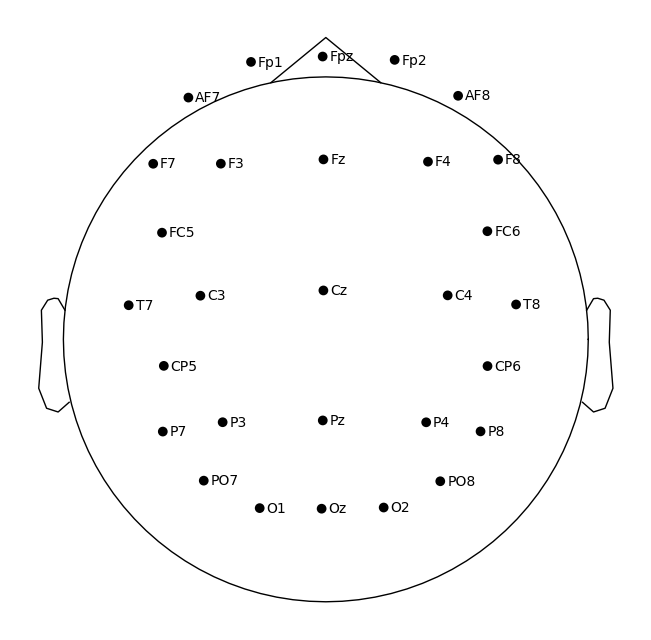

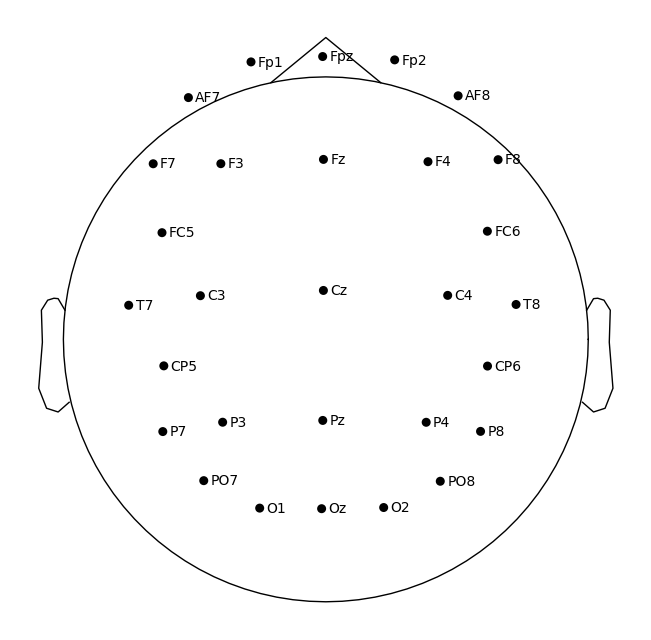

In [8]:
raw.info.set_montage('standard_1020', match_case=False)
mne.viz.plot_montage(raw.info.get_montage())

In [9]:
# Printing all channel names for reference
for ch in raw.info.ch_names:
    print(ch)

AF7
Fpz
F7
Fz
T7
FC6
Fp1
F4
C4
Oz
CP6
Cz
PO8
CP5
O2
O1
P3
P4
P7
P8
Pz
PO7
T8
C3
Fp2
F3
F8
FC5
AF8
ExG 1
ExG 2
ACC32
ACC33
ACC34
Packet Counter
TRIGGER


In [11]:
scalings = {
    'eeg': 500e-6, 
    'eog': 500e-6,
    'misc': 500} 
raw.plot(scalings=scalings, duration = 30)

Channels marked as bad:
none
Attempting to create new mne-python configuration file:
C:\Users\gcantisani\.mne\mne-python.json
